In [3]:
import pandas as pd
import numpy as np
import datetime as dt

In [ ]:
# Eu gostaria de transformar em função todo esse raciocínio que eu fiz, eu entraria com o ticker, com a data e
# ele retornaria o Book de Negociações bneg

In [4]:
def open_NEG_Book(file, index, ticker):
    f = open('../../data/b3/' + file,'r')
    i = pd.read_csv('../../data/b3/' + index, header = None, sep = ' ', index_col = 0, \
                names = ['Linicial', 'Lfinal'])
    
    Linicial = i.loc[ticker].iloc[0]['Linicial']
    Lfinal = i.loc[ticker].iloc[0]['Lfinal']
    
    f.seek(23)
    dia = f.read(10)

    start = 55
    linesize = 238

    data = []

    for line_n in range(Linicial, Lfinal+1):
        f.seek(start+line_n*linesize)
        line = f.readline()
        # Preço, Quantidade, Time
        data.append([ \
            line[74:74+19], \
            line[94:94+18], \
            dia + ' ' + line[113:113+12], \
            line[220:220+8], \
            line[229:229+8]
        ])
    
    bneg = pd.DataFrame(data, columns=['Price', 'Quant', 'Timestamp', 'CCompra', 'CVenda'])
    bneg['Price'] = bneg['Price'].astype(float)
    bneg['Quant'] = bneg['Quant'].astype(int)
    bneg['CCompra'] = bneg['CCompra'].astype(int)
    bneg['CVenda'] = bneg['CVenda'].astype(int)
    bneg['Timestamp'] = pd.to_datetime(bneg['Timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
    bneg = bneg.set_index('Timestamp')
    
    cc = pd.read_csv('../../data/b3/Codigos_Corretoras.txt', header = None, sep = ';', \
                    names = ['Nome', 'Codigo'])
    cc['Codigo'] = cc['Codigo'].astype(int)
    cc = cc.set_index('Codigo')
    
    bneg = bneg.join(cc, on = 'CCompra')
    bneg = bneg.rename(columns={"Nome": "Corretora Compra"})
    bneg = bneg.join(cc, on = 'CVenda')
    bneg = bneg.rename(columns={"Nome": "Corretora Venda"})
    
    return bneg

In [5]:
bneg = open_NEG_Book('NEG_BMF_20191126.TXT', 'NEG_BMF_20191126_index.TXT', 'INDZ19')

In [89]:
# aqui eu salvo um arquivo de log para analisar com mais calma
bneg.to_csv('book.txt', sep = '\t', mode = 'w')

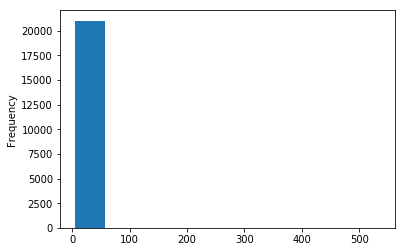

In [9]:
# Histograma não é uma boa idéia pois não dá pra ver nada
bneg['Quant'].plot.hist()

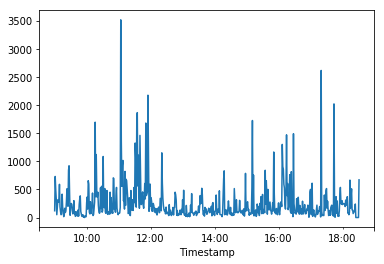

In [15]:
# http://benalexkeen.com/resampling-time-series-data-with-pandas/
quants = bneg.Quant.resample('1min').sum()
quants.plot()

In [ ]:
# Quando quero plotar uma time series com barplot dá um bug bizarro nos labels, a solução estaria em
# https://stackoverflow.com/questions/30133280/pandas-bar-plot-changes-date-format

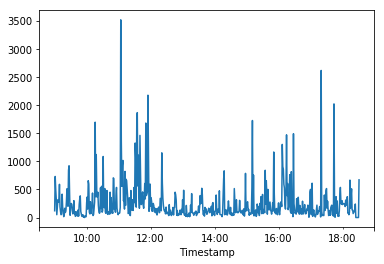

In [21]:
quants = bneg.Quant.resample('1min').sum()
quants.plot()

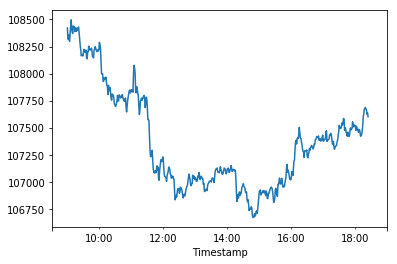

In [22]:
prices = bneg.Price.resample('1min').mean()
prices.plot()

In [35]:
# quantitade total de contratos
total = bneg.Quant.sum()
total

145230

In [39]:
# contagem de contratos
plus50 = bneg[bneg.Quant >= 50]
minus50 = bneg[bneg.Quant < 50]

plus50.Quant.sum() + minus50.Quant.sum()

print(plus50.Quant.sum()/total)
print(minus50.Quant.sum()/total)

0.11044550024099704
0.8895544997590029


In [42]:
# contagem de contratos
plus5 = bneg[bneg.Quant > 5]
minus5 = bneg[bneg.Quant == 5]

print(plus5.Quant.sum()/total)
print(minus5.Quant.sum()/total)

0.38597397231976865
0.6140260276802314


In [44]:
quants = bneg.Quant.resample('H').sum()
quants

Timestamp
2019-11-26 09:00:00    11730
2019-11-26 10:00:00    17675
2019-11-26 11:00:00    35405
2019-11-26 12:00:00    10335
2019-11-26 13:00:00     8205
2019-11-26 14:00:00     9725
2019-11-26 15:00:00    13925
2019-11-26 16:00:00    17730
2019-11-26 17:00:00    14310
2019-11-26 18:00:00     6190
Freq: H, Name: Quant, dtype: int32

In [45]:
bneg

,Price,Quant,CCompra,CVenda,Corretora Compra,Corretora Venda
Timestamp,,,,,,
2019-11-26 09:00:41.127,108400.0,5,107,74,TERRA INVESTIMENTOS,COINVALORES
2019-11-26 09:00:41.127,108400.0,5,107,74,TERRA INVESTIMENTOS,COINVALORES
2019-11-26 09:00:41.127,108400.0,5,85,147,BTG PACTUAL,ATIVA
2019-11-26 09:00:41.127,108400.0,5,85,147,BTG PACTUAL,ATIVA
2019-11-26 09:00:41.127,108400.0,5,308,74,CLEAR,COINVALORES
2019-11-26 09:00:41.127,108400.0,5,308,74,CLEAR,COINVALORES
2019-11-26 09:00:41.127,108400.0,20,308,74,CLEAR,COINVALORES
2019-11-26 09:00:41.127,108400.0,5,107,74,TERRA INVESTIMENTOS,COINVALORES
2019-11-26 09:00:41.127,108400.0,5,107,74,TERRA INVESTIMENTOS,COINVALORES


In [49]:
plus50 = bneg[bneg.Quant >= 100]
plus50

,Price,Quant,CCompra,CVenda,Corretora Compra,Corretora Venda
Timestamp,,,,,,
2019-11-26 09:23:15.083,108290.0,135,16,16,JP MORGAN,JP MORGAN
2019-11-26 09:26:53.268,108160.0,155,3,114,RIO BRAVO,ITAU
2019-11-26 09:26:53.268,108160.0,155,3,114,XP,ITAU
2019-11-26 10:11:17.993,107970.0,100,23,23,NECTON,NECTON
2019-11-26 10:16:04.486,107800.0,200,8,23,UBS,NECTON
2019-11-26 11:23:20.545,107800.0,320,6003,6003,C6,C6
2019-11-26 11:34:54.010,107400.0,100,85,23,BTG PACTUAL,NECTON
2019-11-26 11:34:54.014,107350.0,150,8,23,UBS,NECTON
2019-11-26 11:34:54.015,107350.0,120,8,23,UBS,NECTON
